# 혼자 해보는 데이터분석 연습

### 2008년-2011년 서울특별시 (초)미세먼지 데이터분석
- 작성자 : 손기훈
- 유튜브나 온라인 강의를 따라 친 것이 아닌 스스로 해보는 분석입니다.
- 간단한 데이터 핸들링 능력을 증명하기 위한 예시와 코드입니다.

### 기본 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np

### matplotlib.pyplot 에서 한글폰트 깨짐 방지

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 및 확인

In [4]:
data = pd.read_csv("서울특별시_시간별 (초)미세먼지_20221231/서울시 대기질 자료 제공_2008-2011.csv", encoding="cp949")

In [6]:
data.head() # 상위 5개의 row만

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0


## 데이터 탐색해보기

### 데이터의 개수

In [10]:
print(f"데이터프레임의 행 개수 : {len(data)}")
num = len(data['구분'].unique()) - 1 # '평균' 때문에 -1
print(f"서울지역 {num}개 구를 대상으로 한 조사")

데이터프레임의 행 개수 : 902530
서울지역 25개 구를 대상으로 한 조사


In [11]:
data.shape # (행의 개수, 열의 개수)

(902530, 4)

### 데이터의 상세 정보

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902530 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           902530 non-null  object 
 1   구분           902530 non-null  object 
 2   미세먼지(PM10)   879560 non-null  float64
 3   초미세먼지(PM25)  894380 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.5+ MB


### 데이터의 자료형

In [13]:
data.dtypes

일시              object
구분              object
미세먼지(PM10)     float64
초미세먼지(PM25)    float64
dtype: object

### 데이터의 열

In [14]:
data.columns # 열 출력

Index(['일시', '구분', '미세먼지(PM10)', '초미세먼지(PM25)'], dtype='object')

### 기본 통계량

In [15]:
data.describe()

,미세먼지(PM10),초미세먼지(PM25)
count,879560.000000,894380.000000
mean,51.062809,26.150294
std,40.888807,46.058658
min,1.000000,-273.000000
25%,27.000000,13.000000
50%,43.000000,21.000000
75%,64.000000,33.000000
max,1354.000000,9940.000000


### '구분' 컬럼에는 무슨구가 있을까?

In [16]:
data['구분'].unique() # 가나다순으로 정렬돼있는것 같다

array(['평균', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype=object)

In [17]:
data['구분'].value_counts() # 구 별 데이터의 개수

평균      35063
서초구     35063
구로구     35059
노원구     35057
성동구     35051
강북구     35036
중구      35023
송파구     35020
용산구     35010
금천구     34983
광진구     34976
마포구     34942
양천구     34907
관악구     34881
영등포구    34823
성북구     34790
동작구     34707
도봉구     34690
중랑구     34678
서대문구    34550
은평구     34508
종로구     34411
동대문구    34194
강동구     33939
강서구     33886
강남구     33283
Name: 구분, dtype: int64

### 상위 5개의 데이터

In [47]:
data.head()

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0


### 보고싶은 열만 추출

In [19]:
data[['일시','구분']].head() # 열 단위로 데이터를 추출 (전체를 []안에 담아야함)

,일시,구분
0,2011-12-31 23:00,평균
1,2011-12-31 23:00,강남구
2,2011-12-31 23:00,강동구
3,2011-12-31 23:00,강북구
4,2011-12-31 23:00,강서구


### loc : 행 단위(인덱스)로 데이터 추출

In [49]:
data.loc[1]
# data.loc[-1] : -1이라는 key는 없다

일시             2011-12-31 23:00
구분                          강남구
미세먼지(PM10)                 91.0
초미세먼지(PM25)                58.0
Name: 1, dtype: object

### 맨 마지막 행만 보고 싶으면

In [21]:
print(data.shape) # 행의 끝 번호
row_size = data.shape[0]-1
col_size = data.shape[1]-1
data.loc[row_size]

(902530, 4)


일시             2008-01-01 1:00
구분                         중랑구
미세먼지(PM10)                71.0
초미세먼지(PM25)               10.0
Name: 902529, dtype: object

### 마지막 5개의 행 출력

In [22]:
data.tail()
# iloc부터 내일

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
902525,2008-01-01 1:00,용산구,75.0,18.0
902526,2008-01-01 1:00,은평구,67.0,19.0
902527,2008-01-01 1:00,종로구,56.0,11.0
902528,2008-01-01 1:00,중구,58.0,11.0
902529,2008-01-01 1:00,중랑구,71.0,10.0


### iloc : 행 번호로 추출

In [23]:
print(data.iloc[1])
print(data.iloc[row_size])
data.iloc[-1] # loc와 달리 -1 사용가능 (맨 마지막행 추출)

일시             2011-12-31 23:00
구분                          강남구
미세먼지(PM10)                 91.0
초미세먼지(PM25)                58.0
Name: 1, dtype: object
일시             2008-01-01 1:00
구분                         중랑구
미세먼지(PM10)                71.0
초미세먼지(PM25)               10.0
Name: 902529, dtype: object


일시             2008-01-01 1:00
구분                         중랑구
미세먼지(PM10)                71.0
초미세먼지(PM25)               10.0
Name: 902529, dtype: object

### iloc, loc에 속성 사용

In [24]:
# 슬라이싱으로 추출
subset = data.loc[:, ['일시','구분']]
subset.head()

,일시,구분
0,2011-12-31 23:00,평균
1,2011-12-31 23:00,강남구
2,2011-12-31 23:00,강동구
3,2011-12-31 23:00,강북구
4,2011-12-31 23:00,강서구


In [54]:
subset = data.iloc[:,[1,2,3]]
subset

,구분,미세먼지(PM10),초미세먼지(PM25)
0,평균,89.0,61.0
1,강남구,91.0,58.0
2,강동구,89.0,59.0
3,강북구,68.0,49.0
4,강서구,79.0,69.0
...,...,...,...
902525,용산구,75.0,18.0
902526,은평구,67.0,19.0
902527,종로구,56.0,11.0
902528,중구,58.0,11.0


### loc : 문자열 리스트
### iloc : 정수(열 번호) 리스트

In [26]:
subset = data.loc[:,['일시','구분','미세먼지(PM10)']]
subset

,일시,구분,미세먼지(PM10)
0,2011-12-31 23:00,평균,89.0
1,2011-12-31 23:00,강남구,91.0
2,2011-12-31 23:00,강동구,89.0
3,2011-12-31 23:00,강북구,68.0
4,2011-12-31 23:00,강서구,79.0
...,...,...,...
902525,2008-01-01 1:00,용산구,75.0
902526,2008-01-01 1:00,은평구,67.0
902527,2008-01-01 1:00,종로구,56.0
902528,2008-01-01 1:00,중구,58.0


### iloc는 range 객체로도 열추출 가능

In [27]:
small_range = list(range(1,3)) # list로 감싸줘야한다
subset = data.iloc[:, small_range]
subset

,구분,미세먼지(PM10)
0,평균,89.0
1,강남구,91.0
2,강동구,89.0
3,강북구,68.0
4,강서구,79.0
...,...,...
902525,용산구,75.0
902526,은평구,67.0
902527,종로구,56.0
902528,중구,58.0


### range 활용

In [28]:
small_range = list(range(1,col_size+1,2))
data.iloc[:, small_range]

,구분,초미세먼지(PM25)
0,평균,61.0
1,강남구,58.0
2,강동구,59.0
3,강북구,49.0
4,강서구,69.0
...,...,...
902525,용산구,18.0
902526,은평구,19.0
902527,종로구,11.0
902528,중구,11.0


### range객체 보다 간단한 슬라이싱

In [29]:
data.iloc[:, 1:col_size+1:2]

,구분,초미세먼지(PM25)
0,평균,61.0
1,강남구,58.0
2,강동구,59.0
3,강북구,49.0
4,강서구,69.0
...,...,...
902525,용산구,18.0
902526,은평구,19.0
902527,종로구,11.0
902528,중구,11.0


### loc, iloc 활용

In [30]:
data.iloc[[0,99,999],:col_size:2]

,일시,미세먼지(PM10)
0,2011-12-31 23:00,89.0
99,2011-12-31 20:00,99.0
999,2011-12-30 9:00,97.0


In [31]:
data.loc[[0,99,999],['일시','구분','초미세먼지(PM25)']]

,일시,구분,초미세먼지(PM25)
0,2011-12-31 23:00,평균,61.0
99,2011-12-31 20:00,용산구,76.0
999,2011-12-30 9:00,동작구,76.0


### 우리동네 은평구의 통계랑

In [32]:
eunpyeong = data.loc[data['구분']=='은평구']
eunpyeong.describe()

,미세먼지(PM10),초미세먼지(PM25)
count,33893.000000,34263.000000
mean,50.248960,24.467210
std,42.210815,17.995298
min,1.000000,1.000000
25%,27.000000,13.000000
50%,42.000000,21.000000
75%,62.000000,31.000000
max,1172.000000,609.000000


### 특정한 하나의 값을 구할때는 at, iat이 좋다

In [33]:
ep_avg = eunpyeong.describe().at['mean','미세먼지(PM10)'] # 은평구의 미세먼지 평균 ep_avg
ep_avg

50.24895996223409

### 구 별 평균 미세먼지

In [34]:
dist = data.groupby('구분')
dist.mean(numeric_only=True).head(5)

,미세먼지(PM10),초미세먼지(PM25)
구분,,
강남구,53.078047,27.503309
강동구,49.784002,24.671487
강북구,48.211873,28.086203
강서구,53.111209,28.098605
관악구,53.926797,27.017526


### 은평구 평균값(ep_avg)보다 평균이 높은 구

In [35]:
dist_mean = dist.mean(numeric_only=True)
dist_mean_dust = dist_mean[dist_mean['미세먼지(PM10)'] > ep_avg][['미세먼지(PM10)']] # ep_avg = 50.24895996223409
dist_mean_dust

,미세먼지(PM10)
구분,
강남구,53.078047
강서구,53.111209
관악구,53.926797
구로구,52.493868
금천구,50.532163
동대문구,50.785502
동작구,52.530660
마포구,54.882809
서대문구,52.852961


### 보기좋게 그래프로 시각화

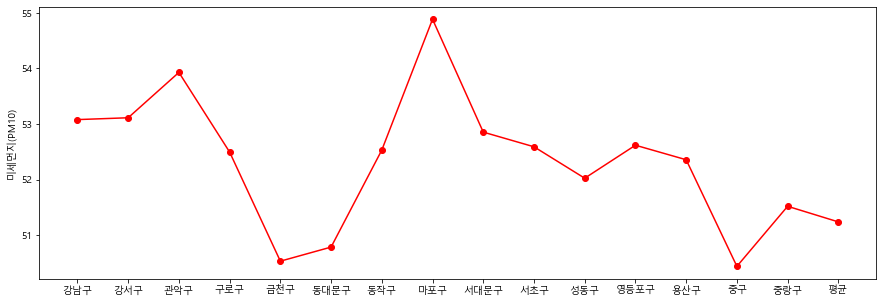

In [38]:
plt.figure(figsize=(15,5))
plt.plot(dist_mean_dust.index, '미세먼지(PM10)', 'o-r', data=dist_mean_dust) # dist_mean_dust : 은평구보다 평균 미세먼지가 높은 구
plt.ylabel('미세먼지(PM10)')
plt.show()

### 산점도

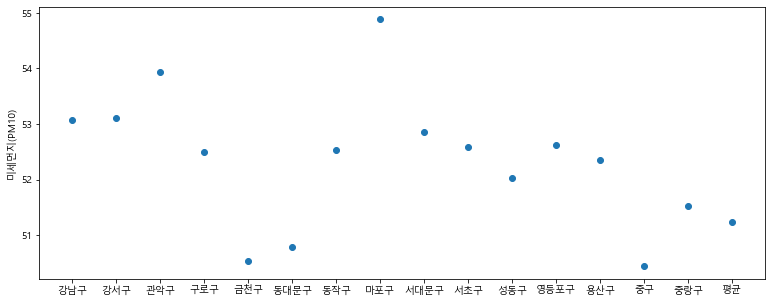

In [39]:
plt.figure(figsize=(13,5))
plt.scatter(dist_mean_dust.index,'미세먼지(PM10)', data=dist_mean_dust)
plt.ylabel('미세먼지(PM10)')
plt.show()